In [2]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 23 ##

In [3]:
births = Table.read_table('baby.csv')

In [4]:
births

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [5]:
# Bootstrap the sample mean

means = make_array()

for i in np.arange(5000):
    resampled = births.sample()
    new_mean = np.average(resampled.column('Maternal Age'))
    means = np.append(means, new_mean)

Approximate 95% Confidence Interval for Mean Maternal Age in Population
[ 26.899  27.56 ]


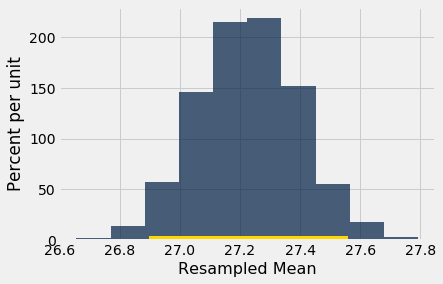

In [6]:
interval_95 = make_array(percentile(2.5, means), percentile(97.5, means))
Table().with_column('Resampled Mean', means).hist()
plots.plot(interval_95, [0, 0], color='gold', lw=8)
print('Approximate 95% Confidence Interval for Mean Maternal Age in Population')
print(np.round(interval_95, 3))

## Average (Mean) ##

In [7]:
values = make_array(2, 3, 3, 9)

In [8]:
sum(values)/len(values), np.average(values), np.mean(values)

(4.25, 4.25, 4.25)

In [9]:
(2 + 3 + 3 + 9)/4

4.25

In [10]:
2*(1/4) + 3*(2/4) + 9*(1/4)

4.25

In [11]:
2*0.25 + 3*0.5 + 9*0.25

4.25

In [12]:
values_table = Table().with_columns('value', values)
values_table

value
2
3
3
9


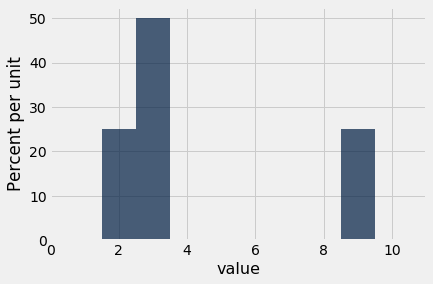

In [13]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [14]:
twos = 2 * np.ones(10)
threes = 3 * np.ones(20)
nines = 9 * np.ones(10)

In [15]:
new_vals = np.append(np.append(twos, threes), nines)

In [16]:
len(new_vals)

40

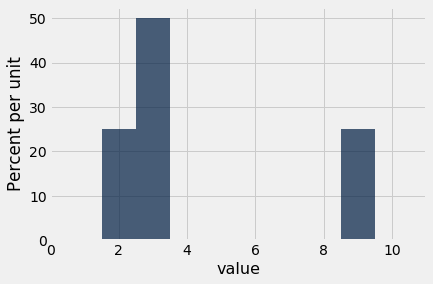

In [17]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [18]:
np.average(values), np.average(new_vals)

(4.25, 4.25)

In [19]:
nba = Table.read_table('nba2013.csv')

In [20]:
nba.labels

('Name', 'Position', 'Height', 'Weight', 'Age in 2013')

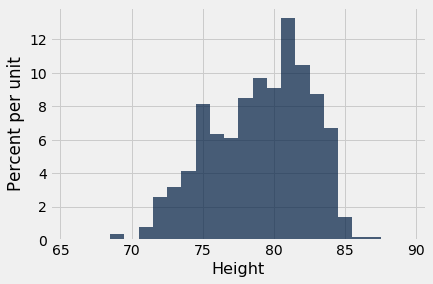

In [21]:
nba.hist('Height', bins=np.arange(65.5, 90.5))

In [22]:
heights = nba.column('Height')
percentile(50, heights), np.average(heights)

(80, 79.065346534653472)

## Standard Deviation ##

In [23]:
sd_table = Table().with_columns('Value', values)
sd_table

Value
2
3
3
9


In [24]:
average_value = np.average(sd_table.column(0))
average_value

4.25

In [25]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

Value,Deviation
2,-2.25
3,-1.25
3,-1.25
9,4.75


In [26]:
sum(deviations)

0.0

In [27]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

Value,Deviation,Squared Deviation
2,-2.25,5.0625
3,-1.25,1.5625
3,-1.25,1.5625
9,4.75,22.5625


In [28]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

7.6875

In [29]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

2.7726341266023544

In [30]:
np.std(values)

2.7726341266023544